In [24]:
# In this code, we will attempt to run MNIST backwards, i.e. given a number, the neural net will output the image of that number.

In [29]:
#Import packages

import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from Dense import Dense
from Activations import Tanh, ReLu, Sigmoid, Softmax, Binary
from Losses import mse, mse_prime
from Network import train, predict
from Visualize import visualize_network
import cv2


In [30]:

def preprocess_data(x, y, limit,new_dim=(28, 28)):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28, 28)
    x = x.astype("float32") / 255
    
    # resize the images
    x_resized = []
    for img in x:
        img_resized = cv2.resize(img, new_dim, interpolation = cv2.INTER_AREA)
        x_resized.append(img_resized)
    x = np.array(x_resized)
    x = x.reshape(x.shape[0], new_dim[0] * new_dim[1], 1)
    
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    
    return x[:limit], y[:limit]

new_dim = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, limit = 60000, new_dim = (new_dim, new_dim))

network = [
    Dense(10, new_dim*new_dim),
    Sigmoid()
]


In [31]:

costs = train(network, mse, mse_prime, y_train, x_train, epochs=100, batch_size = 1, learning_rate=1)

1/1000, error=0.09297584218698596
2/1000, error=0.0610176068255377
3/1000, error=0.05726086655745263
4/1000, error=0.055755068318059986
5/1000, error=0.05505394775974882
6/1000, error=0.05466628967705246
7/1000, error=0.054421235435088346
8/1000, error=0.054257375258140686
9/1000, error=0.05414158313400543
10/1000, error=0.054052502195047855
11/1000, error=0.05397503797952898
12/1000, error=0.0539014168708203
13/1000, error=0.05383686798101142
14/1000, error=0.05378062745124032
15/1000, error=0.05373411443730956
16/1000, error=0.05370036484768054
17/1000, error=0.0536739190131806
18/1000, error=0.0536508573079264
19/1000, error=0.05362894172644599
20/1000, error=0.053606647192842645
21/1000, error=0.05358447569479556
22/1000, error=0.05356509927112896
23/1000, error=0.05354924768235953
24/1000, error=0.053536197506184414
25/1000, error=0.053525368203564495
26/1000, error=0.0535161377773769
27/1000, error=0.05350800598168377
28/1000, error=0.05350068246592475
29/1000, error=0.0534939945

KeyboardInterrupt: 

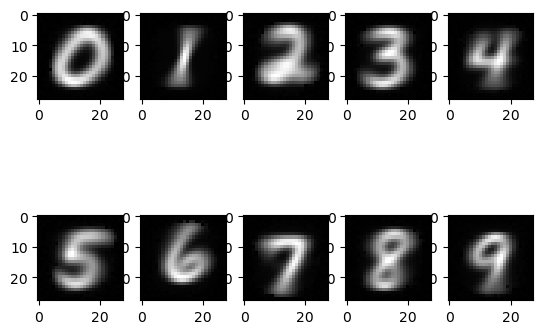

In [32]:
# Visualize each digit, feeding the network with the number and visualizing the output

#make a y for each digit
y = np.zeros((10,10,1))
for i in range(10):
    y[i][i] = 1

# Visualize each digit, feeding the network with the number and visualizing the output
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(predict(network, y[i]).reshape(new_dim, new_dim), cmap="gray")




0.053778577139236804
0.0493879493152878
0.056396978274079516
0.04374555692661951
0.03944095781911354
0.04902694485534042
0.0915125279903049
0.06213619898496505
0.0491375523436668
0.05072429674073181


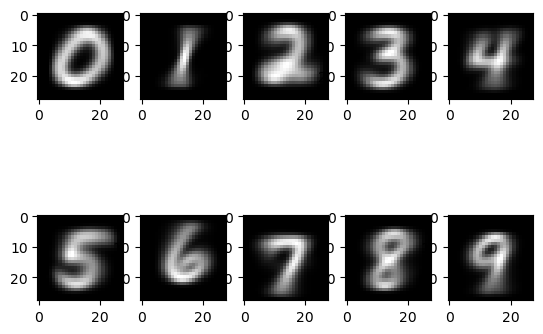

In [35]:

images = []
for i in range(10):
    images.append(np.zeros((new_dim,new_dim)))

for i in range(len(x_train)):
    images[np.argmax(y_train[i])] += x_train[i].reshape(new_dim,new_dim)

for i in range(10):
    images[i] /= np.sum(y_train[:,i])
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap="gray")

# Calculate the difference between the imgs produced by the network and the imgs produced by the average of the training data, mse
for i in range(10):
    print(np.sum((images[i] - predict(network, y[i]).reshape(new_dim,new_dim))**2))

In [22]:
#Now we redo all the above, but without one-hot encoding the y's

def preprocess_data_no_onehotencoding(x, y, limit,new_dim=(28, 28)):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28, 28)
    x = x.astype("float32") / 255
    
    # resize the images
    x_resized = []
    for img in x:
        img_resized = cv2.resize(img, new_dim, interpolation = cv2.INTER_AREA)
        x_resized.append(img_resized)
    x = np.array(x_resized)
    x = x.reshape(x.shape[0], new_dim[0] * new_dim[1], 1)
    y = y/10
    
    return x[:limit], y[:limit]

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data_no_onehotencoding(x_train, y_train, limit = 60000, new_dim = (new_dim, new_dim))

new_network = [
    Dense(1, new_dim*new_dim),
    Sigmoid(),
    Dense(new_dim*new_dim, new_dim*new_dim),
    Sigmoid()
]

costs = train(new_network, mse, mse_prime, y_train, x_train, epochs=1000000, batch_size = 1, learning_rate=1)



1/1000000, error=0.09748150705807818
2/1000000, error=0.07486914097432756
3/1000000, error=0.061034851756195684
4/1000000, error=0.05999753945228677
5/1000000, error=0.05958168627153737
6/1000000, error=0.059104915057887286
7/1000000, error=0.052725734708249164
8/1000000, error=0.04816502368430824
9/1000000, error=0.046187209267322615
10/1000000, error=0.04134076806526987
11/1000000, error=0.039677374264274076
12/1000000, error=0.03946595417316501
13/1000000, error=0.0381987461307918
14/1000000, error=0.03719101375167062
15/1000000, error=0.037021268497353176


KeyboardInterrupt: 

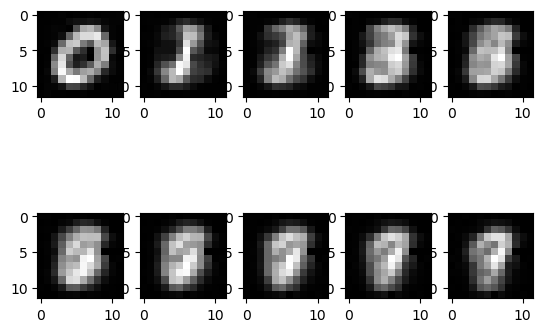

In [23]:
# Now we visualize the output of the network, feeding it with the number and visualizing the output

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(predict(new_network, i/10).reshape(new_dim, new_dim), cmap="gray")